In [2]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
# 현재경로 확인
os.getcwd()

'/Users/johyeogsang/FASTCAMPUS/전체-강의자료/Part 05~11) Machine Learning/06. 회귀분석/실습코드'

In [4]:
# 데이터 불러오기
corolla = pd.read_csv('./ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
# 데이터 수와 변수의 수 확인하기 행x열 나타내기
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


## 범주형 변수를 이진형 변수로 변환

In [6]:
#연료에는 무엇 무엇이 있는가
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [7]:
## 가변수 생성
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [8]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [10]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [11]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

In [12]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가


In [13]:
Fuel = pd.DataFrame({'Petrol' : dummy_p, 'Diesel' : dummy_d, 'CNG': dummy_c})

In [14]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [15]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis = 1, inplace = False)
mlr_data = pd.concat((corolla_, Fuel), 1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [16]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant= 'add')
mlr_data

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,7500,69,12,1998,20544,86,1,0,1300,...,0,1,1,1,0,0,0,1,0,0
1432,1.0,10845,72,9,1998,19000,86,0,0,1300,...,0,0,1,1,0,0,0,1,0,0
1433,1.0,8500,71,10,1998,17016,86,0,0,1300,...,0,0,0,1,0,0,0,1,0,0
1434,1.0,7250,70,11,1998,16916,86,1,0,1300,...,0,0,0,1,0,0,0,1,0,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [17]:
feature_columns = list(mlr_data.columns.difference(['Price']))


X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [18]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [19]:
 ## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     304.9
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:07:30   Log-Likelihood:                -8448.6
No. Observations:                1005   AIC:                         1.697e+04
Df Residuals:                     971   BIC:                         1.713e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -354.5253    142.825     -2.482      0.013    -634.806     -74.244
Age_08_04         -120.7918      4.117    -29.336      0.000    -128.872    -112.712
Airbag_1           262.8055    270.485      0.972      0.331    -267.997     793.608
Airbag_2           -21.4623    143.570     -0.149      0.881    -303.205     260.280
Airco              244.2084     97.208      2.512      0.012      53.446     434.970
Automatic          274.6314    157.400      1.745      0.081     -34.253     583.516
Automatic_airco   2243.5849    204.675     10.962      0.000    1841.929    2645.241
BOVAG_Guarantee    602.5203    132.797      4.537      0.000     341.919     863.122
Backseat_Divider  -323.9413    139.851     -2.316      0.021    -598.387     -49.496
Boardcomputer     -237.1981    123.917     -1.914      0.056    -480.375       5.979
CD_Player          164.2260    106.366      1.544      0.123     -44.507     372.959
CNG              -1161.5762    270.070     -4.301      0.000   -1691.565    -631.587
Central_Lock      -267.2487    146.496     -1.824      0.068    -554.733      20.236
Cylinders           -0.0334      0.002    -14.095      0.000      -0.038      -0.029
Diesel             162.8330    198.901      0.819      0.413    -227.493     553.159
Doors               33.2046     43.137      0.770      0.442     -51.448     117.857
Gears               41.2410    212.576      0.194      0.846    -375.920     458.402
Guarantee_Period    59.5611     14.993      3.973      0.000      30.138      88.984
HP                  18.6895      3.748      4.987      0.000      11.335      26.044
KM                  -0.0163      0.001    -11.858      0.000      -0.019      -0.014
Met_Color            1.1309     80.953      0.014      0.989    -157.732     159.994
Metallic_Rim       191.5002     99.491      1.925      0.055      -3.741     386.742
Mfg_Month          -90.7679     10.789     -8.413      0.000    -111.940     -69.596
Mfg_Year             0.8906      0.918      0.971      0.332      -0.910       2.691
Mfr_Guarantee      245.1175     78.693      3.115      0.002      90.689     399.546
Mistlamps          -36.3980    114.458     -0.318      0.751    -261.012     188.216
Petrol             998.7348    210.302      4.749      0.000     586.037    1411.433
Power_Steering    -315.6273    306.214     -1.031      0.303    -916.546     285.291
Powered_Windows    541.9923    145.355      3.729      0.000     256.745     827.239
Quarterly_Tax       10.8793      1.934      5.624      0.000       7.083      14.675
Radio               93.9483   1121.768      0.084      0.933   -2107.421    2295.317
Radio_cassette    -178.3350   1120.970     -0.159      0.874   -2378.138    2021.468
Sport_Model        275.8745     92.955      2.968      0.003      93.459     458.290
Tow_Bar           -150.

## VIF를 통한 다중공선성 확인 

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

/Users/johyeogsang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/johyeogsang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


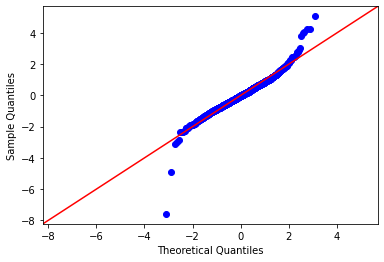

In [21]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

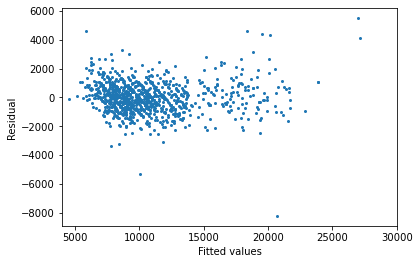

In [22]:
# residual pattern 확인
pred_y = fitted_full_model.predict(train_x)

import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [23]:
 ## 검증 데이터에 대한 예측 
pred_y2 = fitted_full_model.predict(test_x)

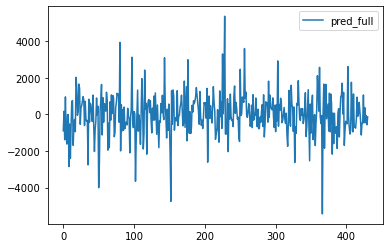

In [24]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
## MSE 성능
mean_squared_error(y_true = test_y, y_pred = pred_y2)

1314468.828299444

# 변수선택법

In [27]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa773d78f10>, 'AIC': 19042.665763024474}


In [28]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fa77729edc0>,
 'AIC': 16965.27388729395}

In [29]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k): #k변수의 수
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 1.0350761413574219 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17501.1
Name: 211, dtype: object


In [30]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [31]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.10495686531066895 seconds.
Processed  630 models on 2 predictors in 1.054922103881836 seconds.
Processed  7140 models on 3 predictors in 11.419461965560913 seconds.
Total elapsed time: 12.852917909622192 seconds.


In [32]:
models

,AIC,model
1,17754.716444,<statsmodels.regression.linear_model.Regressio...
2,17501.052488,<statsmodels.regression.linear_model.Regressio...
3,17308.551204,<statsmodels.regression.linear_model.Regressio...


In [33]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     2205.
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:11:35   Log-Likelihood:                -8650.3
No. Observations:                1005   AIC:                         1.731e+04
Df Residuals:                    1001   BIC:                         1.733e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0239      0.001    -17.428      0.000      -0.027      -0.021
Mfg_Year    1474.3941     37.471     39.348      0.000    1400.863    1547.925
Weight        19.6056      0.955     20.532      0.000      17.732      21.479
const      -2.957e+06   7.44e+04    -39.725      0.000    -3.1e+06   -2.81e+06
==============================================================================
Omnibus:                      194.467   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2303.441
Skew:                          -0.509   Prob(JB):                         0.00
Kurtosis:                      10.347   Cond. No.                     1.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91199
full model AIC:  16965.27389
full model MSE:  13345438.16572
selected model Rsquared:  0.86854
selected model AIC:  17308.55120
selected model MSE:  13345438.16572


Text(0, 0.5, 'BIC')

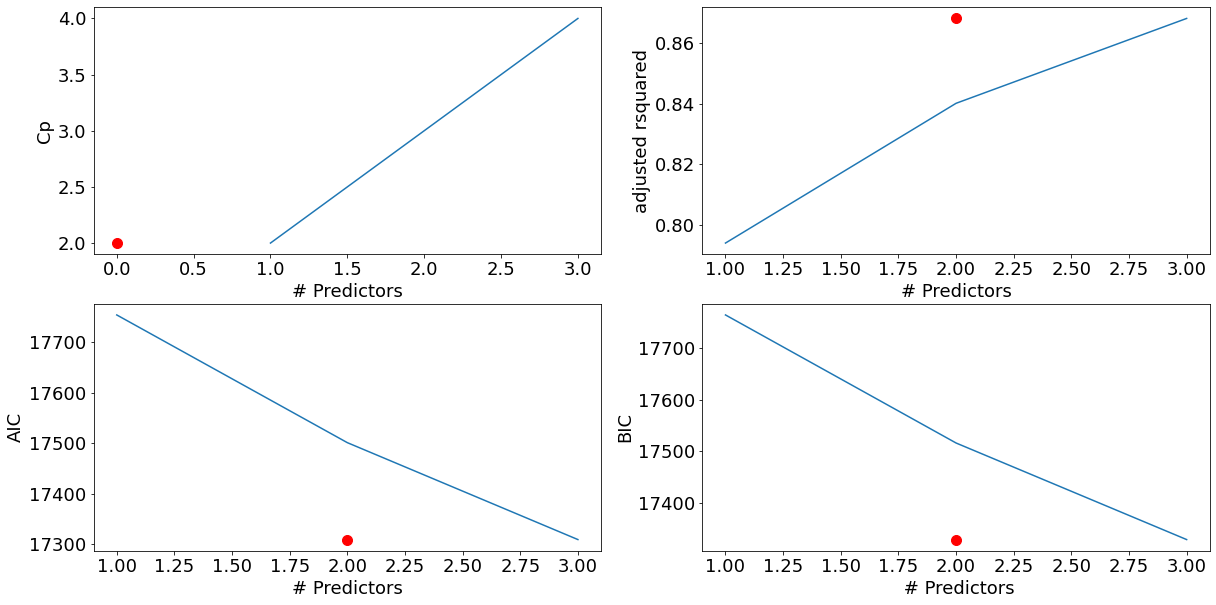

In [35]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [36]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [37]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [38]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.15162301063537598
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa7737be610>
Processed  35 models on 2 predictors in 0.04619002342224121
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa77378b400>
Processed  34 models on 3 predictors in 0.04704999923706055
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa773a2d2e0>
Processed  33 models on 4 predictors in 0.04949498176574707
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa773a17fd0>
Processed  32 models on 5 predictors in 0.05550074577331543
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP'

In [39]:
Forward_best_model.aic

16948.999519193683

In [40]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     440.2
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:16:21   Log-Likelihood:                -8450.5
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     981   BIC:                         1.707e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1084.8335    128.362      8.451      0.000     832.937    1336.730
Automatic_airco   2204.9515    190.805     11.556      0.000    1830.518    2579.385
KM                  -0.0163      0.001    -11.932      0.000      -0.019      -0.014
Weight              12.2529      1.306      9.382      0.000       9.690      14.816
HP                  17.5975      3.550      4.957      0.000      10.631      24.564
Powered_Windows    529.7153    143.648      3.688      0.000     247.823     811.608
BOVAG_Guarantee    605.4734    130.457      4.641      0.000     349.467     861.480
Guarantee_Period    59.0779     14.638      4.036      0.000      30.352      87.804
Quarterly_Tax       11.0531      1.854      5.962      0.000       7.415      14.691
Petrol            2262.7282    430.838      5.252      0.000    1417.258    3108.198
Age_08_04          -30.1596     10.700     -2.819      0.005     -51.158      -9.161
ABS               -362.0679    105.259     -3.440      0.001    -568.627    -155.508
Diesel            1307.0912    414.449      3.154      0.002     493.784    2120.399
Mfr_Guarantee      248.8773     77.133      3.227      0.001      97.513     400.241
Boardcomputer     -225.9099    121.848     -1.854      0.064    -465.022      13.202
Sport_Model        277.7927     87.293      3.182      0.002     106.490     449.095
Airco              237.6751     92.472      2.570      0.010      56.210     419.140
Backseat_Divider  -340.0188    126.467     -2.689      0.007    -588.197     -91.841
Tow_Bar           -148.8025     81.047     -1.836      0.067    -307.848      10.242
Metallic_Rim       186.1742     93.626      1.988      0.047       2.443     369.905
Central_Lock      -268.2168    143.748     -1.866      0.062    -550.305      13.872
CD_Player          173.3545    101.636      1.706      0.088     -26.095     372.804
Automatic          234.8046    153.240      1.532      0.126     -65.911     535.521
const            -2.175e+06   2.57e+05     -8.458      0.000   -2.68e+06   -1.67e+06
==============================================================================
Omnibus:                      125.266   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1217.928
Skew:                          -0.041   Prob(JB):                    3.39e-265
Kurtosis:                       8.392   Cond. No.                     5.75e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 후진소거법

In [41]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [42]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [43]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.15809988975524902
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa747006a90>
Processed  35 models on 34 predictors in 0.11496973037719727
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month'

In [44]:
Backward_best_model.aic

16948.999519193756

# 단계적 선택법

In [45]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [46]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.09450006484985352
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa77375ed30>
forward
Processed  1 models on 0 predictors in 0.0038208961486816406
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa77791d970>
Processed  35 models on 2 predictors in 0.05633687973022461
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa77791d160>
forward
Processed  2 models on 1 predictors in 0.005213022232055664
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa7772826d0>
Processed  34 models on 3 predictors in 0.04826998710632324
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResults

Processed  20 models on 17 predictors in 0.08680224418640137
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Age_08_04', 'ABS', 'Diesel', 'Mfr_Guarantee', 'Boardcomputer', 'Sport_Model', 'Airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa747337280>
forward
Processed  17 models on 16 predictors in 0.03877687454223633
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Age_08_04', 'ABS', 'Diesel', 'Mfr_Guarantee', 'Boardcomputer', 'Sport_Model', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa77375e880>
Processed  19 models on 18 predictors in 0.0456538200378418
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Gua

Processed  24 models on 23 predictors in 0.16749787330627441
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Age_08_04', 'ABS', 'Diesel', 'Mfr_Guarantee', 'Boardcomputer', 'Sport_Model', 'Airco', 'Backseat_Divider', 'Tow_Bar', 'Metallic_Rim', 'Central_Lock', 'CD_Player', 'Automatic', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa773a0e130>
backward
Processed  13 models on 24 predictors in 0.06482696533203125
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Age_08_04', 'ABS', 'Diesel', 'Mfr_Guarantee', 'Boardcomputer', 'Sport_Model', 'Airco', 'Backseat_Divider', 'Tow_Bar', 'Metallic_Rim', 'Central_Lock', 'CD_Player', 'Automatic', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object a

Processed  24 models on 23 predictors in 0.0747380256652832
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Age_08_04', 'ABS', 'Diesel', 'Mfr_Guarantee', 'Boardcomputer', 'Sport_Model', 'Airco', 'Backseat_Divider', 'Tow_Bar', 'Metallic_Rim', 'Central_Lock', 'CD_Player', 'Automatic', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa7779401f0>
backward
Processed  13 models on 24 predictors in 0.0386810302734375
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Age_08_04', 'ABS', 'Diesel', 'Mfr_Guarantee', 'Boardcomputer', 'Sport_Model', 'Airco', 'Backseat_Divider', 'Tow_Bar', 'Metallic_Rim', 'Central_Lock', 'CD_Player', 'Automatic', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 

In [212]:
Stepwise_best_model.aic

17004.91152095006

# 성능평가 

In [47]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(24,) (24,) (24,)


In [48]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [49]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [50]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [219]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   1.20969e+06  1.15366e+06  1.20972e+06  1.15366e+06
RMSE      1099.86      1074.09      1099.87      1074.09
MAE       791.486      775.884      789.485      775.884
MAPE      7.83001      7.69459      7.81251      7.69459


In [51]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
24
24
24
